# Summarizing Data Numerically (Homework3)

For this part, we’ll use the StudentData.txt data that comes from the UCI machine learning repository.Information about the variables in the dataset can be found here. I want you to look at the math scores data set.

You should read up on the variables. The dataset is generally about math scores (G1, G2, G3) for students from two different schools. They also measure a bunch of things about the students’ home life. Hopefully you can make some interesting connections!

### Task 1: Read in the data
* You can either read this dataset from the URL or download it and read it in locally. Check out the first few observations of the data.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
url3 = "https://www4.stat.ncsu.edu/online/datasets/StudentData.txt"
student_data = pd.read_csv(url3, sep=";")
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Task 2: Summarize the Data
This data has many categorical variables and a few numeric. You should do the following:

**Categorical variables**
* Create a one-way contingency table, a two-way contingency table, and a three-way contingency table  
– Interpret a number from each resulting table (that is, pick out a value produced and explain what that value means.)
* Create a conditional two-way table. That is, condition on one variable’s setting and create a two-way table. Do this using two different methods:  
– Once, by subsetting the data (say with .loc) and then creating the two-way table  
– Once, by creating a three-way table and subsetting it

In [13]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [14]:
# one-way contingency table
student_data.sex.value_counts()

,count
sex,
F,208
M,187


* 208: There are 208 female students.

In [15]:
# two-way contingency table
pd.crosstab(
    student_data.sex,
    student_data.school)

school,GP,MS
sex,,
F,183,25
M,166,21


* 183: 183 female students attend GP school.

In [16]:
# three-way contingency table
pd.crosstab(
    [student_data.sex, student_data.school],
    student_data.guardian,
    margins = True)

guardian    father  mother  other  All
sex school                            
F   GP          37     128     18  183
    MS           6      17      2   25
M   GP          41     117      8  166
    MS           6      11      4   21
All             90     273     32  395

* 37: 37 female students who attend GP school have their guardian as their father.

In [17]:
# Create a conditional two-way table.
# Once, by subsetting the data (say with .loc) and then creating the two-way table
subset = student_data.loc[student_data["sex"] == "M"]

pd.crosstab(
    subset.school,
    subset.guardian,
    margins = True)

guardian,father,mother,other,All
school,,,,
GP,41,117,8,166
MS,6,11,4,21
All,47,128,12,187


In [18]:
# Once, by creating a three-way table and subsetting it
three_way = pd.crosstab(
    [student_data.sex, student_data.school],
    student_data.guardian,
    margins = True)

three_way.loc[('F', ("GP", "MS")), :]

guardian    father  mother  other  All
sex school                            
F   GP          37     128     18  183
    MS           6      17      2   25

**Numeric variables (and across groups)**  
The numeric variables are age, absences, and the three test grades variables (G1, G2, and G3).
* Find measures of center and spread for three of these variables (including G3 as one of them)  
– Repeat while subsetting the data by some grouping variable (say with .loc)
* Find measures of center and spread across a single grouping variable for three of these variables (including G3 as one of them)
* Find measures of center and spread across two grouping variables for three of these variables (including G3 as one of them)
* Create a correlation matrix between all of the numeric variables

In [19]:
print(student_data.age.mean())
print(student_data.absences.mean())
print(student_data.G3.mean())
print(" ")
print(student_data.age.median())
print(student_data.absences.median())
print(student_data.G3.median())

16.696202531645568
5.708860759493671
10.415189873417722
 
17.0
4.0
11.0


In [20]:
student_data.age.quantile(q = [0.2, 0.25, 0.5, 0.95])

,age
0.20,15.0
0.25,16.0
0.50,17.0
0.95,19.0


In [21]:
student_data.absences.quantile(q = [0.2, 0.25, 0.5, 0.95])

,absences
0.20,0.0
0.25,0.0
0.50,4.0
0.95,18.3


In [22]:
student_data.G3.quantile(q = [0.2, 0.25, 0.5, 0.95])

,G3
0.20,8.0
0.25,8.0
0.50,11.0
0.95,17.0


In [23]:
# Repeat while subsetting the data by some grouping variable (say with .loc)
subset3 = student_data.loc[:, ['age','absences','G3']]

print(subset3.age.mean())
print(subset3.absences.mean())
print(subset3.G3.mean())
print(" ")
print(subset3.age.median())
print(subset3.absences.median())
print(subset3.G3.median())

16.696202531645568
5.708860759493671
10.415189873417722
 
17.0
4.0
11.0


In [24]:
# Find measures of center and spread across a single grouping variable for three of these variables
# (including G3 as one of them)
student_data.groupby('age')[['absences','G3']].mean()

,absences,G3
age,,
15,3.341463,11.256098
16,5.451923,11.028846
17,6.459184,10.275510
18,6.048780,9.548780
19,10.458333,8.208333
20,5.000000,14.000000
21,3.000000,7.000000
22,16.000000,8.000000


In [25]:
student_data.groupby('age')[['absences','G3']].median()

,absences,G3
age,,
15,2.0,11.0
16,4.0,11.0
17,4.0,11.0
18,4.0,10.0
19,6.5,9.0
20,4.0,15.0
21,3.0,7.0
22,16.0,8.0


In [26]:
student_data.groupby('age')[['absences','G3']].std()

,absences,G3
age,,
15,4.074066,4.596861
16,7.307238,4.282402
17,8.498840,4.290437
18,9.395169,4.994200
19,11.394046,4.606037
20,5.567764,4.582576
21,NaN,NaN
22,NaN,NaN


In [27]:
student_data.age.value_counts()

,count
age,
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


In [28]:
# Find measures of center and spread across two grouping variables for three of these variables
# (including G3 as one of them)
student_data.groupby(['age', 'absences'])['G3'].mean()

age  absences
15   0           10.214286
     2           11.500000
     4           14.000000
     6           12.200000
     8            9.714286
                   ...    
20   0           18.000000
     4           15.000000
     11           9.000000
21   3            7.000000
22   16           8.000000
Name: G3, Length: 86, dtype: float64

In [29]:
student_data.groupby(['age', 'absences'])['G3'].median()

age  absences
15   0           11.0
     2           11.0
     4           14.0
     6           13.0
     8           10.0
                 ... 
20   0           18.0
     4           15.0
     11           9.0
21   3            7.0
22   16           8.0
Name: G3, Length: 86, dtype: float64

In [30]:
student_data.groupby(['age', 'absences'])['G3'].std()

age  absences
15   0           6.154535
     2           3.391165
     4           2.121320
     6           3.552777
     8           2.360387
                   ...   
20   0                NaN
     4                NaN
     11               NaN
21   3                NaN
22   16               NaN
Name: G3, Length: 86, dtype: float64

In [31]:
# Create a correlation matrix between all of the numeric variables
student_data.loc[:, ['age','absences','G1', 'G2', 'G3']].corr()

,age,absences,G1,G2,G3
age,1.000000,0.175230,-0.064081,-0.143474,-0.161579
absences,0.175230,1.000000,-0.031003,-0.031777,0.034247
G1,-0.064081,-0.031003,1.000000,0.852118,0.801468
G2,-0.143474,-0.031777,0.852118,1.000000,0.904868
G3,-0.161579,0.034247,0.801468,0.904868,1.000000


#  Summarizing Student Data Graphically

## Taks 1

#### Categorical variables

In [32]:
import matplotlib.pyplot as plt

In [33]:
student_data["sexC"] = student_data["sex"].astype("category")
student_data.sexC = student_data.sexC.cat.rename_categories(["Male", "Female"])

student_data["schoolC"] = student_data["school"].astype("category")

In [34]:
stack_table = pd.crosstab(
    student_data.sexC,
    student_data.schoolC)
stack_table

schoolC,GP,MS
sexC,,
Male,183,25
Female,166,21


In [35]:
stack_table.loc[:, "GP"]

,GP
sexC,
Male,183
Female,166


In [36]:
stack_table.loc[:, "MS"]

,MS
sexC,
Male,25
Female,21


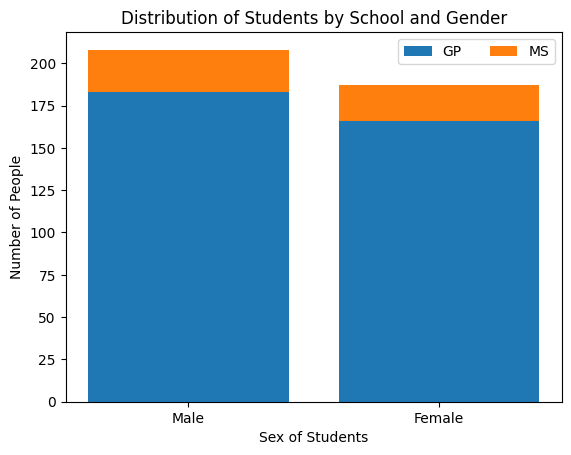

In [37]:
plt.bar(
  x = student_data.sexC.cat.categories,
  height = stack_table.loc[:, "GP"],
  label = "GP")
plt.bar(
  x = student_data.sexC.cat.categories,
  height = stack_table.loc[:, "MS"],
  bottom = stack_table.loc[:, "GP"],
  label = "MS"
)
plt.xlabel("Sex of Students")
plt.ylabel("Number of People")
plt.title("Distribution of Students by School and Gender")
plt.legend(loc = 0, ncol=2)

The number of male students is greater than that of female students. Additionally, the number of students at GP School is significantly higher than that at MS School.

Text(0.5, 1.0, 'Distribution of Students by School and Gender')

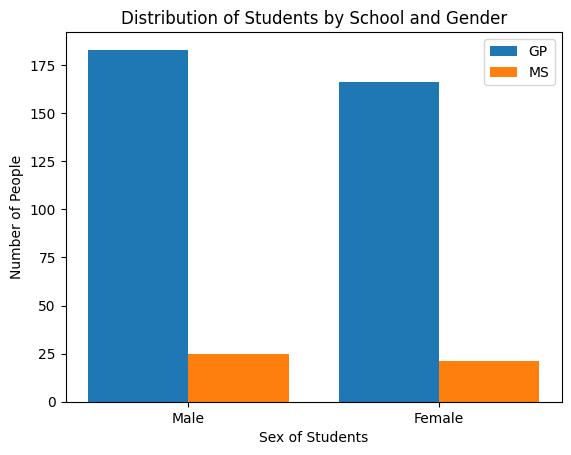

In [38]:
plt.bar(
  x = [1, 2],
  height = stack_table.loc[:, "GP"],
  width = 0.4,
  label = "GP")
plt.bar(
  x = [1.4, 2.4],
  height = stack_table.loc[:, "MS"],
  width = 0.4,
  label = "MS")
plt.xticks([1.2, 2.2], student_data.sexC.cat.categories)
plt.xlabel("Sex of Students")
plt.ylabel("Number of People")
plt.legend(loc = 0)
plt.title("Distribution of Students by School and Gender")

There is a clear contrast in student enrollment between the two schools.

#### Numeric variables (and across groups)

In [39]:
age_GP = student_data.loc[student_data.schoolC == "GP", "age"]
age_MS = student_data.loc[student_data.schoolC == "MS", "age"]

abs_GP = student_data.loc[student_data.schoolC == "GP", "absences"]
abs_MS = student_data.loc[student_data.schoolC == "MS", "absences"]

In [40]:
import numpy as np

In [41]:
age_MS = pd.concat([age_MS, pd.Series([np.nan for _ in range(302)])])
abs_MS = pd.concat([abs_MS, pd.Series([np.nan for _ in range(302)])])

(348, 2)


[Text(0.5, 0, 'Age')]

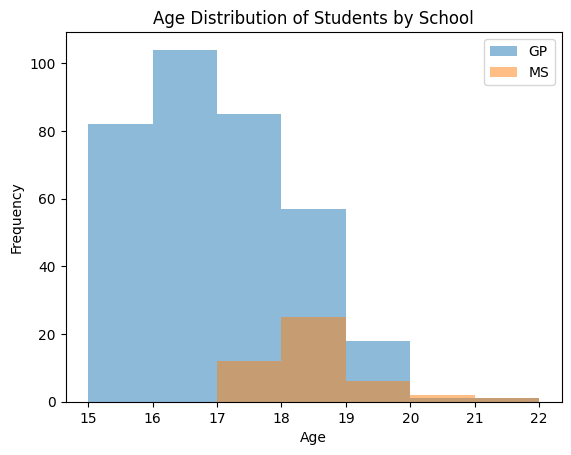

In [42]:
age_school = pd.DataFrame(zip(age_GP, age_MS),
                      columns = ["GP", "MS"])
print(age_school.shape)
age_school.plot.hist(alpha = 0.5, bins=range(15, 23), align='mid', title = "Age Distribution of Students by School") \
    .set(xlabel = "Age")

At GP School, most students are between 15 and 17 years old, whereas MS School primarily consists of students aged 17 to 18.

(348, 2)


[Text(0.5, 0, 'Number of Absences')]

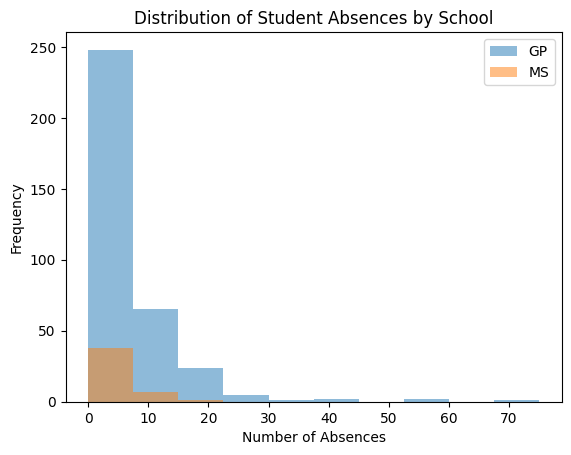

In [43]:
absence_school = pd.DataFrame(zip(abs_GP, abs_MS),
                      columns = ["GP", "MS"])
print(absence_school.shape)
absence_school.plot.hist(alpha = 0.5, title = "Distribution of Student Absences by School") \
    .set(xlabel = "Number of Absences")

The majority of students at GP School have fewer than 10 absences, and a similar pattern is observed at MS School.

[Text(0.5, 0, 'Age')]

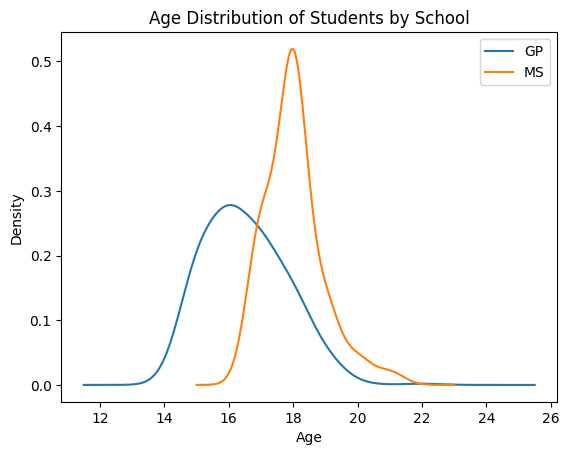

In [44]:
age_school.plot.density(bw_method = 0.5, title = "Age Distribution of Students by School")\
    .set(xlabel = "Age")

The student age distribution differs between the two schools, as reflected in the histogram. However, the student density is higher at MS School.

[Text(0.5, 0, 'Number of Absences')]

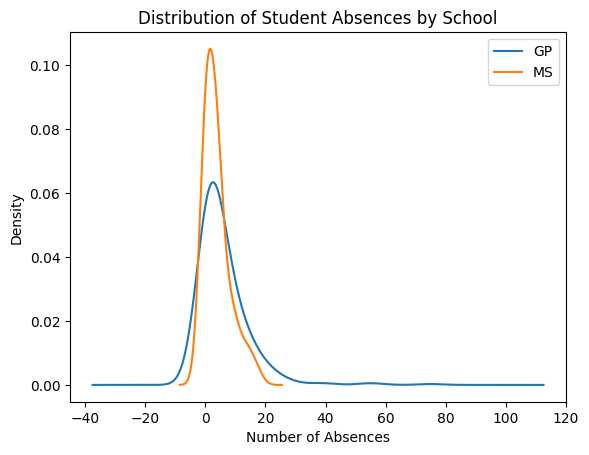

In [45]:
absence_school.plot.density(bw_method = 0.5, title = "Distribution of Student Absences by School") \
    .set(xlabel = "Number of Absences")

The distribution of students based on absences follows a pattern similar to the previous histogram.

[Text(0.5, 0, 'Name of School'), Text(0, 0.5, 'Age')]

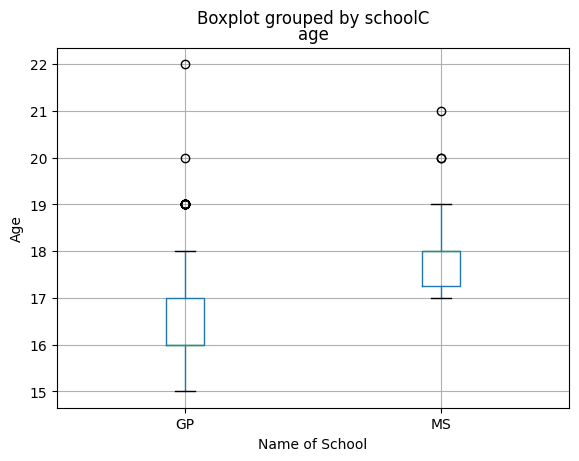

In [46]:
student_data.boxplot(column = ["age"], by = "schoolC") \
    .set(xlabel = "Name of School", ylabel = "Age")

The box plot aligns with the histogram trend but provides a clearer view of outliers.

[Text(0.5, 0, 'Name of School'), Text(0, 0.5, 'Number of Absences')]

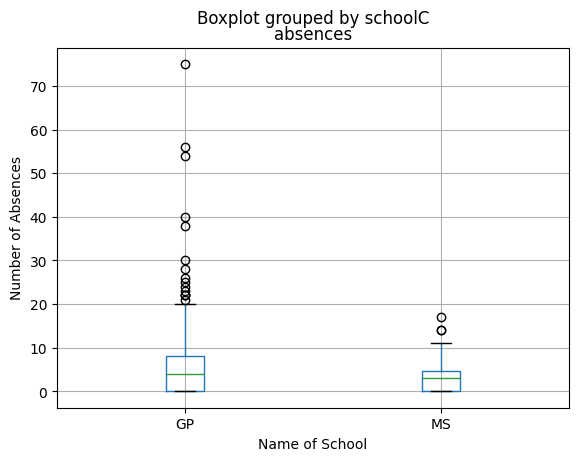

In [47]:
student_data.boxplot(column = ["absences"], by = "schoolC") \
    .set(xlabel = "Name of School", ylabel = "Number of Absences")

<Axes: title={'center': 'Scatter plot of G1 and G3'}, xlabel='G1', ylabel='G3'>

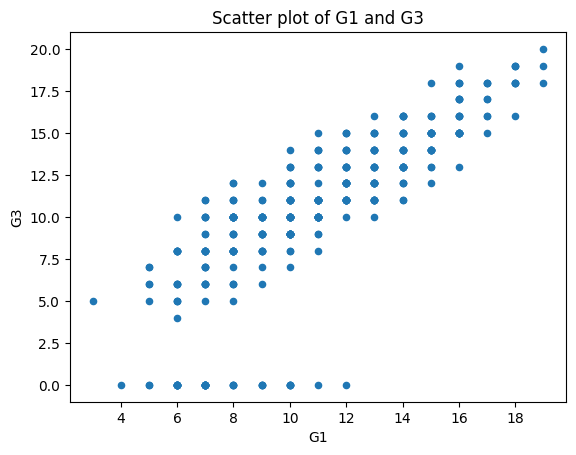

In [50]:
student_data.plot.scatter(x = "G1", y = "G3", title = "Scatter plot of G1 and G3")

The scatter plot illustrates the relationship between G1 and G3 scores. The linear upward trend suggests that most students obtained similar scores in both exams. However, nine students deviated from this trend, achieving scores in G1 but failing to obtain scores in G3.

#  Plotting the NFL Data

For this part we’ll read in the NFL Box Score data that we read in class videos. The data is available here.  
You may not be familiar with (American) football, but each row of this dataset represents information about one particular game. The most important thing is the score for the home and away teams (AQ1, ..., AFinal, HQ, ..., HFinal). Other variables like yards gained (passing or rushing or combined) can be good indicators of score. Things like turnovers, penalties, etc. can also be indicators of how the came went.

###  Task 1: Read in the data  
* You can either read this dataset from the URL or download it and read it in locally. Check out the first few observations of the data.
* Convert the homeTeam, awayTeam, day, stadium, startTime, toss, roof, and surface to category type variables.

In [4]:
data = "/content/scoresFull.csv"
nfl_data = pd.read_csv(data)
nfl_data.head()

,week,date,day,season,awayTeam,AQ1,AQ2,AQ3,AQ4,AOT,...,homeFumLost,homeNumPen,homePenYds,home3rdConv,home3rdAtt,home4thConv,home4thAtt,homeTOP,HminusAScore,homeSpread
0,1,5-Sep,Thu,2002,San Francisco 49ers,3,0,7,6,-1,...,0,10,80,4,8,0,1,32.47,-3,-4.0
1,1,8-Sep,Sun,2002,Minnesota Vikings,3,17,0,3,-1,...,1,4,33,2,6,0,0,28.48,4,4.5
2,1,8-Sep,Sun,2002,New Orleans Saints,6,7,7,0,6,...,0,8,85,1,6,0,1,31.48,-6,6.0
3,1,8-Sep,Sun,2002,New York Jets,0,17,3,11,6,...,1,10,82,4,8,2,2,39.13,-6,-3.0
4,1,8-Sep,Sun,2002,Arizona Cardinals,10,3,3,7,-1,...,0,7,56,6,10,1,2,34.40,8,6.0


In [5]:
nfl_data["homeTeamC"] = nfl_data.homeTeam.astype("category")
nfl_data["awayTeamC"] = nfl_data.awayTeam.astype("category")
nfl_data["dayC"] = nfl_data.day.astype("category")
nfl_data["stadiumC"] = nfl_data.stadium.astype("category")
nfl_data["startTimeC"] = nfl_data.startTime.astype("category")
nfl_data["tossC"] = nfl_data.toss.astype("category")
nfl_data["roofC"] = nfl_data.roof.astype("category")
nfl_data["surfaceC"] = nfl_data.surface.astype("category")

### Task 2: Summarize the data
* I want you to look at some trends during the regular season. This means you should remove any data where the week is not 1 through 17.
* You should summarize some of the variables grouped by season and week, season alone, and week alone (three different scenarios).  
– Produce some common numeric summaries of variables across these different groups.  
– Similarly, produce some common plots over time (mostly line plots I’d think!)

* Write at least one function that can be used to easily create a plot for this data.  
– For instance, you might have a function that takes in a numeric variable and a statistic (or a categorical variable, etc.). Then the function plots the average (or some other statistic) of the numeric variable across the seasons.  
– This is just an example! You get to decide what might be useful to do here.

In [6]:
nfl_data['week'] = pd.to_numeric(nfl_data['week'], errors='coerce')
nfl_data = nfl_data[nfl_data['week'] <= 17]

In [7]:
nfl_season_week = pd.crosstab(
    [nfl_data['season'], nfl_data['week']],
    columns=["stat" for _ in range(nfl_data.shape[0])],
    values=nfl_data['HFinal'],
    aggfunc=['mean', 'median', 'std', 'count']
)

nfl_season_week

mean median        std count
col_0             stat   stat       stat  stat
season week                                   
2002   1.0   26.125000   27.0  11.050641    16
       2.0   18.187500   16.5  10.387292    16
       3.0   24.428571   27.0  11.460395    14
       4.0   28.285714   27.0  14.187907    14
       5.0   23.214286   25.5   8.441460    14
...                ...    ...        ...   ...
2014   13.0  27.312500   27.5  14.012940    16
       14.0  19.750000   19.0  10.908712    16
       15.0  18.437500   18.0   9.750000    16
       16.0  22.937500   23.0  11.227756    16
       17.0  20.500000   20.0  10.013324    16

[221 rows x 4 columns]

<Axes: xlabel='season,week'>

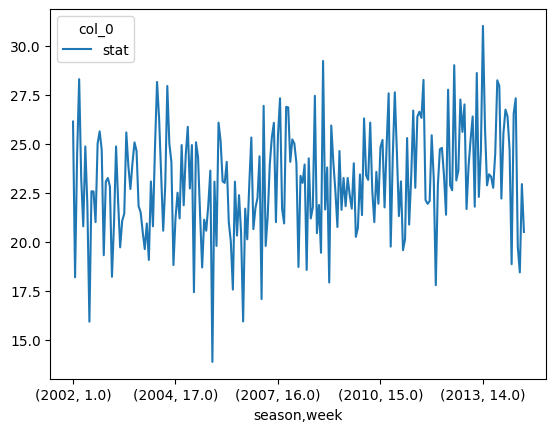

In [8]:
nfl_season_week["mean"].plot()

The weekly mean values fluctuate over time. From 2010 to 2013, a slight upward trend is observed, followed by a recent decline.

In [91]:
nfl_season = pd.crosstab(
    nfl_data['season'],
    columns=["stat" for _ in range(nfl_data.shape[0])],
    values=nfl_data['HFinal'],
    aggfunc=['mean', 'median', 'std', 'count']
)

nfl_season

,mean,median,std,count
col_0,stat,stat,stat,stat
season,,,,
2002,22.796875,23.0,10.182152,256
2003,22.609375,23.0,10.119470,256
2004,22.738281,23.0,10.400502,256
2005,22.441406,21.0,9.797383,256
2006,21.082031,20.0,9.856475,256
2007,23.121094,22.0,10.568033,256
2008,23.308594,24.0,10.454499,256
2009,22.570312,23.0,10.666557,256


<Axes: xlabel='season'>

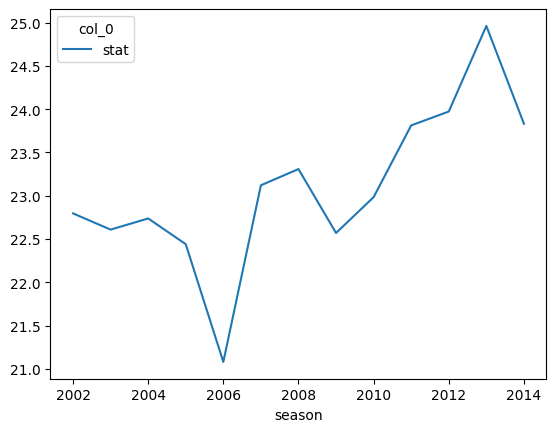

In [97]:
nfl_season["mean"].plot()

The seasonal mean values show a consistent upward trend.

In [92]:
nfl_week = pd.crosstab(
    nfl_data['week'],
    columns=["stat" for _ in range(nfl_data.shape[0])],
    values=nfl_data['HFinal'],
    aggfunc=['mean', 'median', 'std', 'count']
)

nfl_week

,mean,median,std,count
col_0,stat,stat,stat,stat
week,,,,
1.0,22.139423,20.5,10.595541,208
2.0,22.840580,23.0,9.842384,207
3.0,22.646465,23.0,10.153955,198
4.0,24.092391,23.0,10.874704,184
5.0,24.324176,24.0,10.158379,182
6.0,22.988950,23.0,9.254422,181
7.0,23.338889,23.0,10.948924,180
8.0,23.359551,23.0,10.573121,178


<Axes: xlabel='week'>

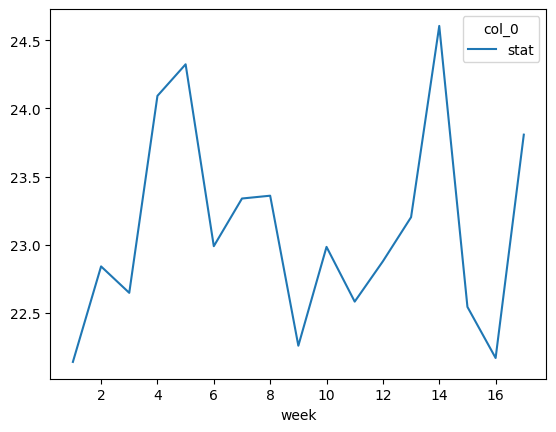

In [99]:
nfl_week["mean"].plot()

The weekly mean values exhibit significant fluctuations without a clear trend.

In [53]:
def nfl_plot(df, numeric_column, group_column, stat_name):

    stat_series = df.groupby(group_column)[numeric_column].agg(stat_name)

    stat_series.plot()

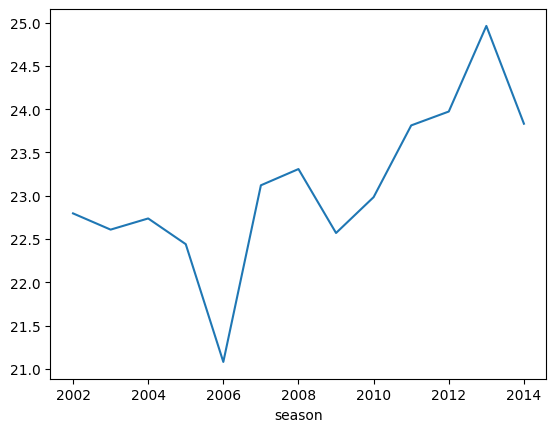

In [54]:
nfl_plot(nfl_data, "HFinal", "season", "mean")